# Exploratory Data Analysis of the 2009 Generic Emergency Department
#### The aim of this EDA is to understand the Emergency Department data to produce actionable insight.
Author: Alireza Lajevardipour

In [29]:
# Import python libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt




In [2]:
# Read data from csv file into pandas dataframe
datafile = 'Generic_ED2009.csv'
df = pd.read_csv(datafile)
df.head(3)

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Arrival Time,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
0,67269,63190,3,15,01-01-09,0,01/01/09,01/01/09,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,733,619,4000.0,DRUG / ALCOHOL / POISONING,F43.9,EMOTIONAL CRISIS
1,444991,63193,4,15,01-01-09,0,01/01/09,01/01/09,W,DID NOT WAIT,DNW,* DID NOT WAIT,420,274,9000.0,INJURY,Z53.2,DID NOT WAIT
2,444992,63194,4,8,01-01-09,0,01/01/09,01/01/09,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,13,0,7000.0,EYE,H10.9,CONJUNCTIVITIS


In [3]:
nrows = df.shape[0]
num_unique_hosp = df['MRN'].nunique()
print("Is MRN a unique identifier?: {0}".format(nrows == num_unique_hosp))

Is MRN a unique identifier?: False


In [4]:
# View value types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30188 entries, 0 to 30187
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MRN                                    30188 non-null  int64  
 1   Presentation Visit Number              30188 non-null  int64  
 2   Triage Priority                        30188 non-null  int64  
 3    Age  (yrs)                            30188 non-null  int64  
 4   Arrival Date                           30188 non-null  object 
 5   Arrival Time                           30188 non-null  int64  
 6   Dr Seen Date                           30004 non-null  object 
 7   Depart Actual Date                     30188 non-null  object 
 8   Depart Status Code                     30188 non-null  object 
 9   Departure Status Desc.                 30188 non-null  object 
 10  Depart. Dest. Code                     30188 non-null  object 
 11  De

In [5]:
#checking for null values
df.isnull().sum()

MRN                                        0
Presentation Visit Number                  0
Triage Priority                            0
 Age  (yrs)                                0
Arrival Date                               0
Arrival Time                               0
Dr Seen Date                             184
Depart Actual Date                         0
Depart Status Code                         0
Departure Status Desc.                     0
Depart. Dest. Code                         0
Depart. Dest. Desc.                        0
TimeDiff Arrival-Actual Depart (mins)      0
TimeDiff TreatDrNr-Act. Depart (mins)      1
Presenting Complaint Code                 19
Presenting Complaint Desc.                19
Diag Code                                  0
Diagnosis Desc.                            0
dtype: int64

In [6]:
# delete the whole 'Dr Seen Date' column and 1 row with null value in 'TimeDiff TreatDrNr-Act. Depart (mins)' column
# data in 'Dr Seen Date' column can be calculated from other data in the table
# here we do not need to remove null values in other columns

df1 = df.drop('Dr Seen Date', 1) 
df1 = df1.dropna(subset=['TimeDiff TreatDrNr-Act. Depart (mins)'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30187 entries, 0 to 30187
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MRN                                    30187 non-null  int64  
 1   Presentation Visit Number              30187 non-null  int64  
 2   Triage Priority                        30187 non-null  int64  
 3    Age  (yrs)                            30187 non-null  int64  
 4   Arrival Date                           30187 non-null  object 
 5   Arrival Time                           30187 non-null  int64  
 6   Depart Actual Date                     30187 non-null  object 
 7   Depart Status Code                     30187 non-null  object 
 8   Departure Status Desc.                 30187 non-null  object 
 9   Depart. Dest. Code                     30187 non-null  object 
 10  Depart. Dest. Desc.                    30187 non-null  object 
 11  Ti

In [14]:
# correct data type of columns

df1['MRN']=df1['MRN'].astype('string')
df1['Presentation Visit Number']=df1['Presentation Visit Number'].astype('string')
df1['Presenting Complaint Code ']=df1['Presenting Complaint Code'].astype('string')
df1['Arrival Date']=df1['Arrival Date'].astype('datetime64')


df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30187 entries, 0 to 30187
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   MRN                                    30187 non-null  string        
 1   Presentation Visit Number              30187 non-null  string        
 2   Triage Priority                        30187 non-null  int64         
 3    Age  (yrs)                            30187 non-null  int64         
 4   Arrival Date                           30187 non-null  datetime64[ns]
 5   Arrival Time                           30187 non-null  int64         
 6   Depart Actual Date                     30187 non-null  object        
 7   Depart Status Code                     30187 non-null  object        
 8   Departure Status Desc.                 30187 non-null  object        
 9   Depart. Dest. Code                     30187 non-null  object

In [8]:
# addin the comumn of 'Wating Time' using data from two other columns of 'TimeDiff Arrival-Actual Depart (mins)' and
# 'TimeDiff TreatDrNr-Act. Depart (mins)'. However thier value need to be cleaned from comma


def clean_comma(x):
    """ If the value is a string, then remove comma delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace(',', ''))
    return(x)

df1['TimeDiff Arrival-Actual Depart (mins)'] = df1['TimeDiff Arrival-Actual Depart (mins)'].apply(clean_comma).astype('float')

df1['TimeDiff TreatDrNr-Act. Depart (mins)'] = df1['TimeDiff TreatDrNr-Act. Depart (mins)'].apply(clean_comma).astype('float')


waitingtime = df1['TimeDiff Arrival-Actual Depart (mins)'] - df1['TimeDiff TreatDrNr-Act. Depart (mins)']

df1['Wating Time'] = waitingtime

In [16]:
df1.describe()

,Triage Priority,Age (yrs),Arrival Time,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Wating Time
count,30187.000000,30187.000000,30187.000000,30187.000000,30187.000000,30168.000000,30187.000000
mean,3.265644,5.770928,14.109352,204.660715,143.604797,18699.516375,61.055918
std,0.686613,5.101640,6.048891,176.634653,173.131043,9115.791434,70.212287
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,1.000000,10.000000,94.000000,33.000000,9000.000000,15.000000
50%,3.000000,4.000000,15.000000,160.000000,87.000000,24000.000000,38.000000
75%,4.000000,10.000000,19.000000,262.000000,196.000000,24000.000000,86.000000
max,5.000000,15.000000,23.000000,5828.000000,5753.000000,73005.000000,2782.000000


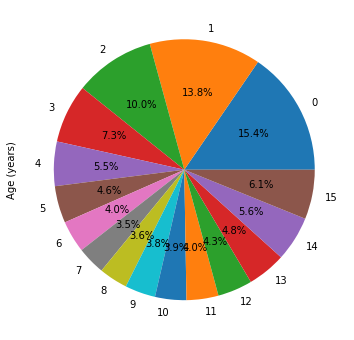

In [33]:
df1['Triage Priority'].groupby(df1[' Age  (yrs)']).count().plot(kind="pie", ylabel='Age (years)',figsize=(6,6), autopct='%1.1f%%');

In [17]:
df1['Triage Priority'].value_counts().to_frame()

,Triage Priority
3,17915
4,8603
2,2306
5,1112
1,251


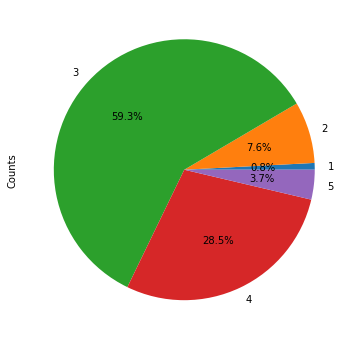

In [22]:
df1['Wating Time'].groupby(df1['Triage Priority']).count().plot(kind="pie", ylabel='Counts',figsize=(6,6), autopct='%1.1f%%');

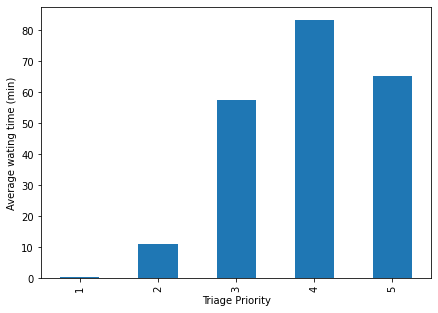

In [27]:
df1['Wating Time'].groupby(df1['Triage Priority']).mean().plot(kind='bar', ylabel='Average wating time (min)',figsize=(7,5));

In [28]:
df1[['Arrival Time','Triage Priority','Wating Time']].corr()

,Arrival Time,Triage Priority,Wating Time
Arrival Time,1.00000,0.016640,0.124470
Triage Priority,0.01664,1.000000,0.238149
Wating Time,0.12447,0.238149,1.000000


In [30]:
pearson_coef, p_value = stats.pearsonr(df1['Triage Priority'], df1['Wating Time'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2381489225360796  with a P-value of P = 0.0


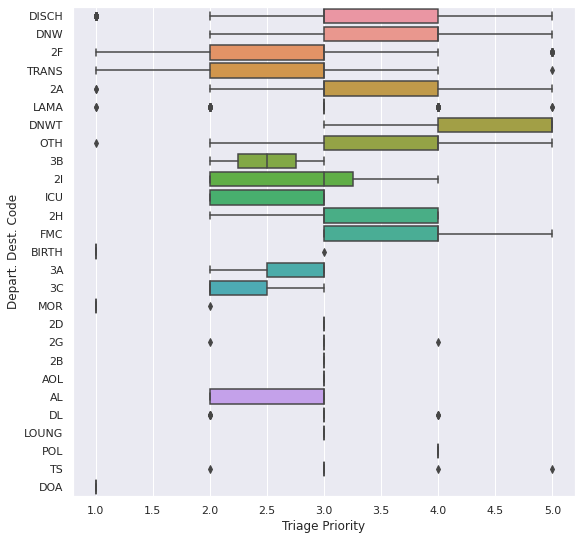

In [39]:
sns.set(rc={'figure.figsize':(9,9)})
sns.boxplot(x="Triage Priority", y="Depart. Dest. Code", data=df1);

In [40]:
df1['Depart. Dest. Code'].value_counts().to_frame()

,Depart. Dest. Code
DISCH,22844
DNW,3238
2F,3149
TRANS,418
LAMA,193
2A,125
FMC,46
OTH,29
2I,28
DL,27


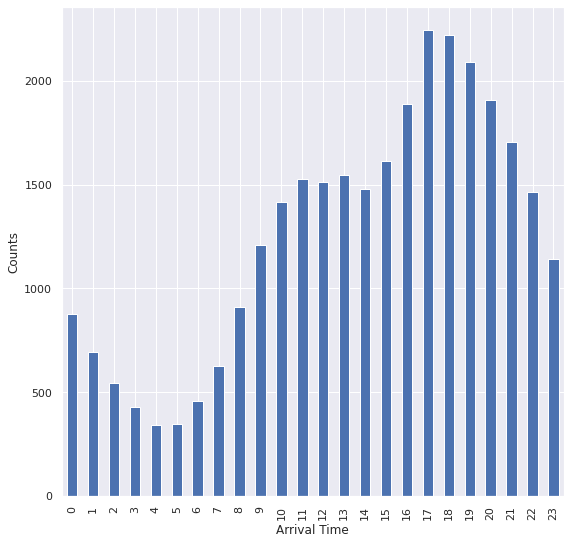

In [41]:
df['Triage Priority'].groupby(df['Arrival Time']).count().plot(kind="bar", ylabel='Counts');

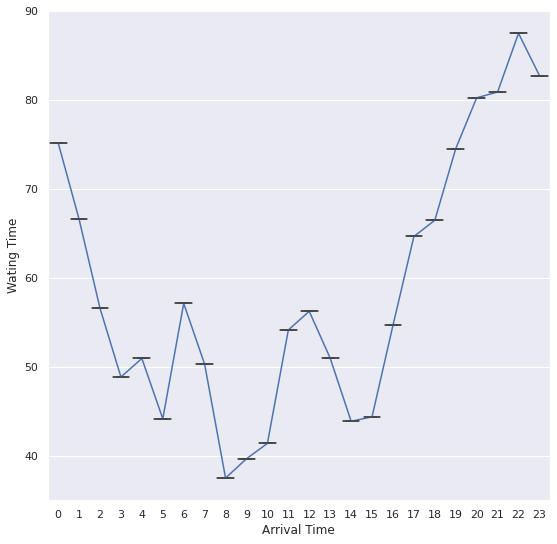

In [43]:
# grouping data
df1_gptest = df1[['Arrival Time','Wating Time']]
grouped_1 = df1_gptest.groupby(['Arrival Time'],as_index=False).mean()
grouped_1

sns.boxplot(x="Arrival Time", y="Wating Time", data=grouped_1);
sns.lineplot(x="Arrival Time", y="Wating Time", data=grouped_1);

In [44]:
# grouping data
df2_gptest = df1[['Triage Priority','Wating Time']]
grouped_2 = df2_gptest.groupby(['Triage Priority'],as_index=False).mean()
grouped_2

,Triage Priority,Wating Time
0,1,0.585657
1,2,11.154380
2,3,57.348925
3,4,83.396025
4,5,65.075540


In [46]:
# grouping data
df3_gptest = df1[['Triage Priority',' Age  (yrs)','Wating Time']]
grouped_3 = df3_gptest.groupby(['Triage Priority',' Age  (yrs)'],as_index=False).mean()
grouped_pivot = grouped_3.pivot(index='Triage Priority',columns=' Age  (yrs)')
grouped_pivot

Wating Time                                              \
 Age  (yrs)              0          1          2          3          4    
Triage Priority                                                           
1                  0.343284   0.325000   0.407407   0.312500   0.071429   
2                 13.281690   9.525066   8.769547   9.974194   8.419643   
3                 56.433623  57.170914  56.345629  61.396747  56.246602   
4                 76.647679  82.798667  80.228198  82.731449  79.980044   
5                 64.696970  58.847458  66.575342  49.770833  56.796296   

                                                                        \
 Age  (yrs)             5          6          7          8          9    
Triage Priority                                                          
1                 0.133333   0.111111   1.083333   0.000000   1.750000   
2                 9.182796  10.469136   7.895522   8.071429  13.608696   
3                61.942572  52.478390  57.879433  55.529825  55.511586   
4                82.332518  82.013298  78.983871  77.237975  79.363636   
5                59.432836  58.736842  54.950000  40.702128  73.088235   

                                                                        \
 Age  (yrs)             10         11         12         13         14   
Triage Priority                                                          
1                 0.333333   7.000000   0.111111   1.333333   1.142857   
2                12.520000   8.982143  23.000000   8.338235  13.117647   
3                57.702359  57.132509  60.395973  54.805338  58.883378   
4                81.878914  86.874747  87.987250  83.604167  90.034106   
5                70.558140  52.328571  69.255814  75.028846  72.298246   

                            
 Age  (yrs)             15  
Triage Priority             
1                 0.363636  
2                13.031579  
3                58.572967  
4                90.920200  
5                78.283019

In [51]:
df1['MRN'].value_counts().to_frame()

,MRN
416537,68
449734,34
449963,26
359964,25
385065,24
...,...
489663,1
309383,1
461884,1
482584,1
